# Description of Atoms module and analysis

### A crystal structure is defined by lattice-matrix, atomic coordinates and element types. As an example, let's create Siliocn crystal structure. We need to to import Atoms class from jarvis-tools to do that.

In [1]:
# If you don't have jarvis-tools package installed, try "pip install jarvis-tools"
from jarvis.core.atoms import Atoms

In [2]:
#Silicon crystal structure example. These crystal-structure data are generally obtained from XRD-type experiments.
box = [[2.715, 2.715, 0], [0, 2.715, 2.715], [2.715, 0, 2.715]]
coords = [[0, 0, 0], [0.25, 0.25, 0.25]]
elements = ["Si", "Si"]
Si = Atoms(lattice_mat=box, coords=coords, elements=elements)

### Once the Atoms class is created, several properties can be calculated. Examples are given below:

In [3]:
print ('volume',Si.volume)
print ('density in g/cm3', Si.density)
print ('composition as dictionary', Si.composition)
print ('Chemical formula', Si.composition.reduced_formula)
print ('Spacegroup info', Si.spacegroup())
print ('lattice-parameters', Si.lattice.abc, Si.lattice.angles)
print ('packing fraction',Si.packing_fraction)
print ('number of atoms',Si.num_atoms)
print ('Center of mass', Si.get_center_of_mass())
print ('Atomic number list', Si.atomic_numbers)

volume 40.02575174999999
density in g/cm3 2.3303545408113413
composition as dictionary {'Si': 2}
Chemical formula Si
Spacegroup info Fd-3m (227)
lattice-parameters [3.83959, 3.83959, 3.83959] [60.0, 60.0, 60.0]
packing fraction 0.27858
number of atoms 2
Center of mass [0.67875 0.67875 0.67875]
Atomic number list [14, 14]


In [4]:
# Print Atoms class in POSCAR format
print (Si)

Si
1.0
2.715 2.715 0.0
0.0 2.715 2.715
2.715 0.0 2.715
Si
2
direct
0.0 0.0 0.0
0.25 0.25 0.25



### For databases purposes, it maybe important to store the Atoms class as a dictionary and then reloading the dictionary as Atoms object. An example is given below:

In [5]:
Si.to_dict()

OrderedDict([('lattice_mat',
              [[2.715, 2.715, 0.0], [0.0, 2.715, 2.715], [2.715, 0.0, 2.715]]),
             ('coords', [[0.0, 0.0, 0.0], [0.25, 0.25, 0.25]]),
             ('elements', ['Si', 'Si']),
             ('abc', [3.83959, 3.83959, 3.83959]),
             ('angles', [60.0, 60.0, 60.0]),
             ('cartesian', False),
             ('props', ['', ''])])

In [6]:
d = Si.to_dict()
new_atoms = Atoms.from_dict(d)

Making a supercells: there are two methods

In [7]:
supercell_1 = Si.make_supercell([2,2,2])
supercell_2 = Si.make_supercell_matrix([[2,0,0],[0,2,0],[0,0,2]])
supercell_1.density == supercell_2.density

True

### Many tensor-like material properties such as elastic constants require conventional cell representations, which can be obtained as follows:

In [17]:
from jarvis.analysis.structure.spacegroup import Spacegroup3D

spg = Spacegroup3D(Si)
Si_cvn = spg.conventional_standard_structure
print ('Number of atoms in the conventional cell', Si_cvn.num_atoms) 
print ('Wycoff multoplicity in the primitive-cell', spg._dataset["wyckoffs"]) 

Number of atoms in the conventional cell 8
Wycoff sites ['b', 'b']


### Realistic materials contain several types of point, line, surface and volume defects. Examples to create point-defects and surfaces are shown below:

In [9]:
from jarvis.analysis.defects.vacancy import Vacancy

vacs = Vacancy(atoms=Si).generate_defects(enforce_c_size=10.0) #enforces cell-size to be close to 10 Angstroms
len(vacs), vacs[0].to_dict()["defect_structure"].num_atoms
# We find that there are only one unique point vacanc available based on Wycoff-position information

(1, 53)

In [10]:
from jarvis.analysis.defects.surface import wulff_normals, Surface

# Let's create (1,1,1) surface with three layers, and vacuum=18.0 Angstrom
# We center it around origin so that it looks good during visualization
surface_111 = Surface(atoms=Si, indices=[1, 1, 1], layers = 3, vacuum = 18 ).make_surface().center_around_origin() 

In [11]:
print (surface_111)

Si
1.0
7.679179643685906 0.0 0.0
3.8395898218429525 6.650364651656329 0.0
0.0 0.0 27.405035885099004
Si
24
direct
0.33333337987747863 0.2499999417117229 0.399903978739414
-0.3333333801657332 -0.4166664918018347 0.37130511552210377
0.16666673669907556 0.08333315846850153 0.6286948844778963
0.49999997665586365 0.41666672495494383 0.5142994316086551
-0.16666678338734842 -0.2499997085586136 0.399903978739414
-4.6544145315685626e-08 0.41666672495494383 0.600096021260586
0.3333331934126425 -0.24999970855861375 0.4857005683913449
-0.33333356663056946 0.08333385792782866 0.37130511552210377
0.1666669231639118 -0.4166671912611618 0.6286948844778963
-0.4999998368793001 -0.0833336247747194 0.5142994316086551
-0.16666659692251207 0.24999994171172302 0.399903978739414
-0.4999998832793181 -0.08333362477471967 0.6000960212605859
-0.1666666433225305 0.2499999417117229 0.48570056839134484
0.1666665966342577 -0.4166664918018348 0.3713051155221037
-0.3333332865009334 0.08333315846850153 0.628694884477896

### For practical applications, materials are generally used as heterostructures. We can use the following as an example to make Si(111)-Si(111) interface

In [12]:
from jarvis.analysis.interface.zur import ZSLGenerator, mismatch_strts, get_hetero,make_interface

film = Surface(atoms=Si, indices=[1, 1, 1], layers = 3, vacuum = 18 ).make_surface().center_around_origin() 
substrate = Surface(atoms=Si, indices=[1, 1, 1], layers = 3, vacuum = 18 ).make_surface().center_around_origin()  
info = make_interface(film=film, subs=substrate)['interface'].center(vacuum=18)

In [13]:
info

Si
1.0
7.679179643685906 0.0 0.0
3.8395898218429525 6.650364651656329 0.0
0.0 0.0 53.10755427810232
Si
48
direct
0.3333333798774787 0.24999994171172285 0.49187052256317165
-0.3333331000360973 -0.4166671912611619 0.7992430390448659
0.16666641016942133 0.08333385792782858 0.6664224341812589
-0.16666682978736652 -0.2499997085586138 0.7254538141206397
0.4999999302558456 0.4166667249549438 0.7844851940600207
0.3333331934126425 -0.24999970855861364 0.6811802791661041
-4.6544145475713774e-08 0.4166667249549438 0.7402116591054851
-0.3333332865009333 0.08333315846850146 0.7992430390448659
0.1666665966342577 -0.4166664918018348 0.6664224341812589
-0.16666664332253042 0.24999994171172285 0.72545381412064
1.399206906872241e-07 -0.08333362477471946 0.7402116591054851
-0.49999988327931805 -0.08333362477471973 0.7844851940600207
-0.4999998368792999 -0.08333362477471946 0.7402116591054851
0.1666669231639118 -0.4166671912611618 0.799243039044866
-0.33333356663056934 0.08333385792782858 0.66642243418125

### Atomic-neighborhood analysis

In [22]:
from jarvis.analysis.structure.neighbors import NeighborsAnalysis

nb = NeighborsAnalysis(Si)

In [40]:
bins_rdf, rdf, nbs = nb.get_rdf() #Global Radial distribution function
adfa, bins_a = nb.ang_dist_first() #Angular distribution function upto first neighbor
adfb, bins_b = nb.ang_dist_second() #Angular distribution function upto second neighbor
ddf, bins_d = nb.get_ddf() #Dihedral distribution function upto first neighbor

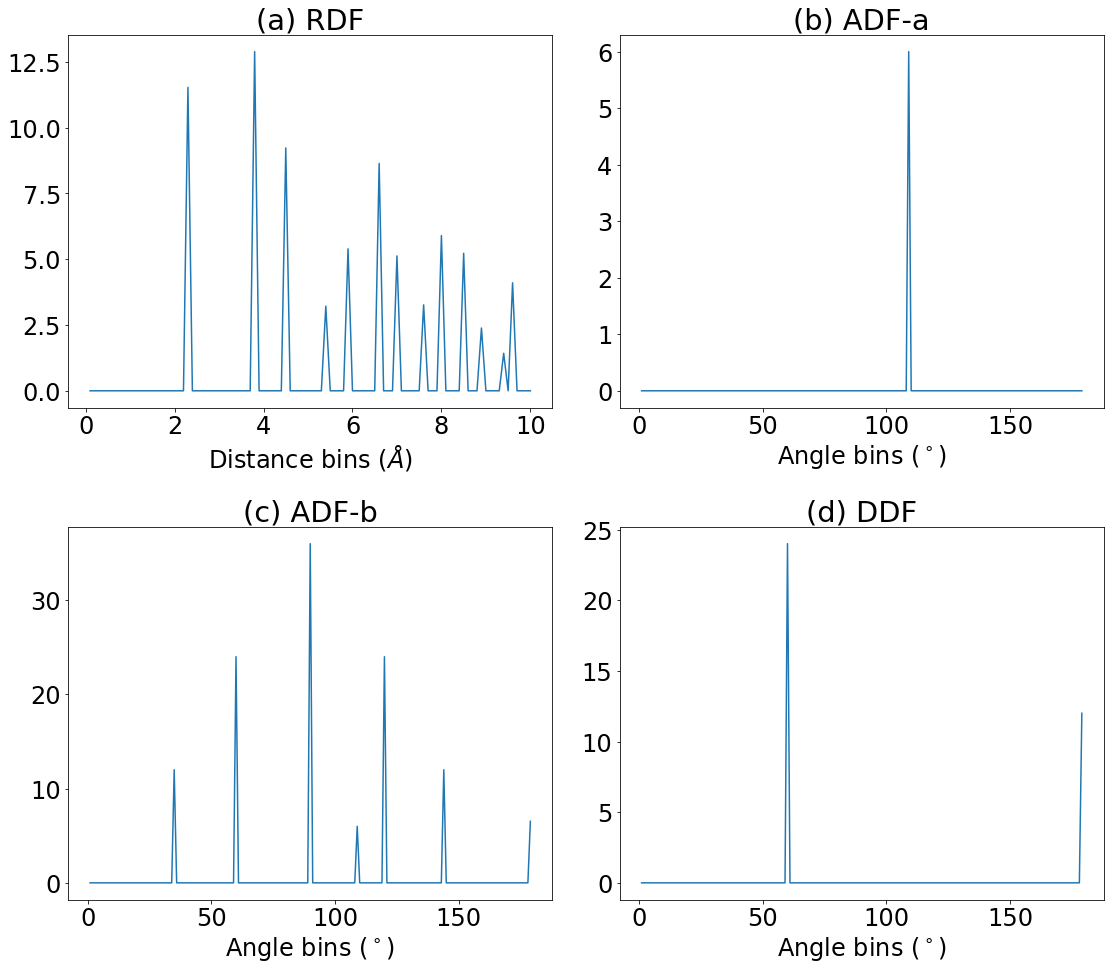

In [41]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

the_grid = GridSpec(2, 2)
plt.rcParams.update({'font.size': 24})
plt.figure(figsize=(16,14))

plt.subplot(the_grid[0, 0])
plt.title('(a) RDF')
plt.plot(bins_rdf, rdf)
plt.xlabel(r'Distance bins ($\AA$)')

plt.subplot(the_grid[0, 1])
plt.title('(b) ADF-a')
plt.plot(bins_a[:-1], adfa)
plt.xlabel(r'Angle bins ($^\circ$)')

plt.subplot(the_grid[1, 0])
plt.title('(c) ADF-b')
plt.plot(bins_b[:-1], adfb)
plt.xlabel(r'Angle bins ($^\circ$)')

plt.subplot(the_grid[1, 1])
plt.title('(d) DDF')
plt.plot(bins_d[:-1], ddf)
plt.xlabel(r'Angle bins ($^\circ$)')
plt.tight_layout()

### Getting CFID descriptors: We can convert the chemo-physical information in the Atoms class to CFID features that can be used in Machine-learning

In [19]:
from jarvis.ai.descriptors.get_desc import CFID

cfid = CFID(Si)
feature_names = cfid.get_comp_descp(print_names=True)
feature_values = cfid.get_comp_descp().tolist()

In [20]:
print (feature_names[0], feature_values[0], len(feature_names), len(feature_values) )

bp_mult_atom_rad 3490.3 1557 1557
